Start notebook

In [1]:
import random

# Set the global seed
_GLOBAL_SEED = 42
random.seed(_GLOBAL_SEED)

In [2]:
import pandas as pd

# Read the training dataset
train_df = pd.read_csv('../_Dataset/train_dataset.csv')

# Read the test dataset
test_df = pd.read_csv('../_Dataset/test_dataset.csv')


In [3]:
train_disorder_subclass_df = train_df.drop("genetic_disorder", axis=1)
test_disorder_subclass_df = test_df.drop("genetic_disorder", axis=1)

Format the dataset

In [4]:
train_disorder_subclass_x = train_disorder_subclass_df.drop("disorder_subclass",axis=1)
train_disorder_subclass_y = train_disorder_subclass_df["disorder_subclass"]

test_disorder_subclass_x = test_disorder_subclass_df.drop("disorder_subclass",axis=1)
test_disorder_subclass_y = test_disorder_subclass_df["disorder_subclass"]

In [5]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler and transform the training data
train_disorder_subclass_x = scaler.fit_transform(train_disorder_subclass_x)

# Use the same scaler to transform the test data
test_disorder_subclass_x = scaler.transform(test_disorder_subclass_x)

Declare the models

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.calibration import CalibratedClassifierCV

logistic_regression_classifier = LogisticRegression(solver='newton-cg', random_state=_GLOBAL_SEED)
kn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier(random_state=_GLOBAL_SEED)
gaussian_nb_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier(random_state=_GLOBAL_SEED)
gradient_boosting_classifier = GradientBoostingClassifier(random_state=_GLOBAL_SEED)
xgb_classifier = XGBClassifier(random_state=_GLOBAL_SEED)
lgb_classifier = LGBMClassifier(random_state=_GLOBAL_SEED)
svc_classifier = SVC(decision_function_shape='ovo')
catb_classifier = CatBoostClassifier(random_state=_GLOBAL_SEED, verbose=False)

# Assuming catb_classifier is your CatBoostClassifier
catb_classifier = CalibratedClassifierCV(catb_classifier, method='sigmoid', cv=5)

Train the models on the genetic disorder training dataset

In [7]:
logistic_regression_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
kn_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
decision_tree_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
gaussian_nb_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
random_forest_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
gradient_boosting_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
xgb_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
lgb_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
svc_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)
catb_classifier.fit(train_disorder_subclass_x, train_disorder_subclass_y)

models_collection = {
    'Logistic Regression': logistic_regression_classifier, 
    'K-Nearest Neighbors': kn_classifier, 
    'Decision Tree': decision_tree_classifier, 
    'Gaussian Naive Bayes': gaussian_nb_classifier, 
    'Random Forest': random_forest_classifier, 
    'Gradient Boosting': gradient_boosting_classifier, 
    'XGBoost': xgb_classifier, 
    'LightGBM': lgb_classifier,
    'Support Vector Classifier': svc_classifier,
    'CatBoost': catb_classifier
}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 29
[LightGBM] [Info] Start training from score -4.886202
[LightGBM] [Info] Start training from score -5.287090
[LightGBM] [Info] Start training from score -1.741575
[LightGBM] [Info] Start training from score -2.375633
[LightGBM] [Info] Start training from score -2.699223
[LightGBM] [Info] Start training from score -3.439823
[LightGBM] [Info] Start training from score -1.350441
[LightGBM] [Info] Start training from score -1.522392
[LightGBM] [Info] Start training from score -1.948060


In [8]:
from sklearn.metrics import accuracy_score, recall_score, mean_squared_error

# Initialize an empty dictionary to store the results
results = {}

for model_name, model in models_collection.items():
    # Make predictions on the test data
    predictions = model.predict(test_disorder_subclass_x)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_disorder_subclass_y, predictions)
    
    # Calculate recall
    recall = recall_score(test_disorder_subclass_y, predictions, average='weighted')
    
    # Calculate mean squared error
    mse = mean_squared_error(test_disorder_subclass_y, predictions)
    
    # Store the results
    results[model_name] = {'Accuracy': accuracy, 'Recall': recall, 'Mean Squared Error': mse}
    
# Sort the results by accuracy
sorted_results = sorted(results.items(), key=lambda item: item[1]['Accuracy'], reverse=True)


In [9]:
# Print the sorted results
for model_name, metrics in sorted_results:
    print("---------------------------")
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print("---------------------------")

---------------------------
Model: CatBoost
Accuracy: 0.6736842105263158
Recall: 0.6736842105263158
Mean Squared Error: 2.119113573407202
---------------------------
---------------------------
Model: Gradient Boosting
Accuracy: 0.6681440443213297
Recall: 0.6681440443213297
Mean Squared Error: 2.2958448753462606
---------------------------
---------------------------
Model: LightGBM
Accuracy: 0.66398891966759
Recall: 0.66398891966759
Mean Squared Error: 2.2601108033240997
---------------------------
---------------------------
Model: XGBoost
Accuracy: 0.6578947368421053
Recall: 0.6578947368421053
Mean Squared Error: 2.2922437673130194
---------------------------
---------------------------
Model: Random Forest
Accuracy: 0.5961218836565096
Recall: 0.5961218836565096
Mean Squared Error: 2.7833795013850415
---------------------------
---------------------------
Model: Decision Tree
Accuracy: 0.5124653739612188
Recall: 0.5124653739612188
Mean Squared Error: 3.974792243767313
--------------

Use the top 4 models to create an ensemle model

In [10]:
from sklearn.ensemble import VotingClassifier

# Get the top 4 models
top_4_models = sorted_results[:4]

# Create a list of tuples where each tuple contains a model name and an estimator
estimators = [(model_name, models_collection[model_name]) for model_name, _ in top_4_models]

# Create the ensemble model
ensemble = VotingClassifier(estimators=estimators, voting='soft')

# Train the ensemble model
ensemble.fit(train_disorder_subclass_x, train_disorder_subclass_y)

# Make predictions on the test data
ensemble_predictions = ensemble.predict(test_disorder_subclass_x)

# Calculate and print the accuracy of the ensemble model
ensemble_accuracy = accuracy_score(test_disorder_subclass_y, ensemble_predictions)

# Calculate recall
ensemble_recall = recall_score(test_disorder_subclass_y, ensemble_predictions, average='weighted')

# Calculate mean squared error
ensemble_mse = mean_squared_error(test_disorder_subclass_y, ensemble_predictions)

print(f"Ensemble accuracy: {ensemble_accuracy}")
print(f"Ensemble recall: {ensemble_recall}")
print(f"Ensemble mean squared error: {ensemble_mse}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 14437, number of used features: 29
[LightGBM] [Info] Start training from score -4.886202
[LightGBM] [Info] Start training from score -5.287090
[LightGBM] [Info] Start training from score -1.741575
[LightGBM] [Info] Start training from score -2.375633
[LightGBM] [Info] Start training from score -2.699223
[LightGBM] [Info] Start training from score -3.439823
[LightGBM] [Info] Start training from score -1.350441
[LightGBM] [Info] Start training from score -1.522392
[LightGBM] [Info] Start training from score -1.948060
Ensemble accuracy: 0.6759002770083102
Ensemble recall: 0.6759002770083102
Ensemble mean squared error: 2.0759002770083104


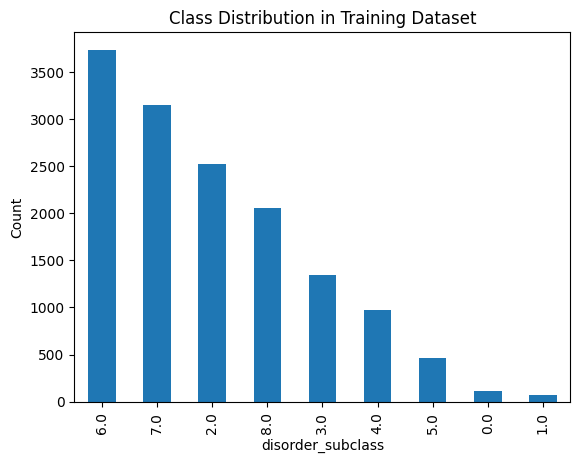

In [15]:
import numpy as np
import matplotlib.pyplot as plt

train_disorder_subclass_df['disorder_subclass'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Dataset')
plt.xlabel('disorder_subclass')
plt.ylabel('Count')
plt.show()

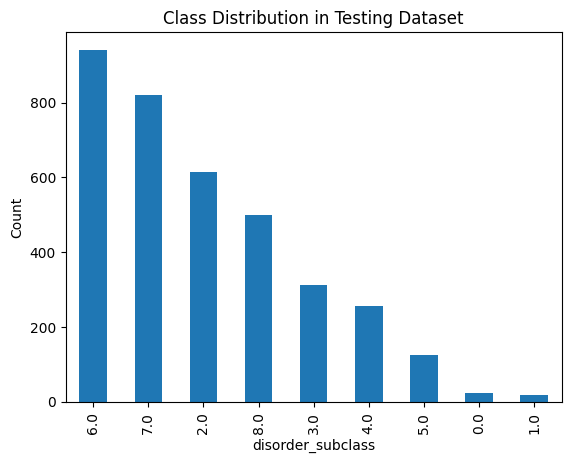

In [16]:
import numpy as np
import matplotlib.pyplot as plt

test_disorder_subclass_df['disorder_subclass'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Testing Dataset')
plt.xlabel('disorder_subclass')
plt.ylabel('Count')
plt.show()

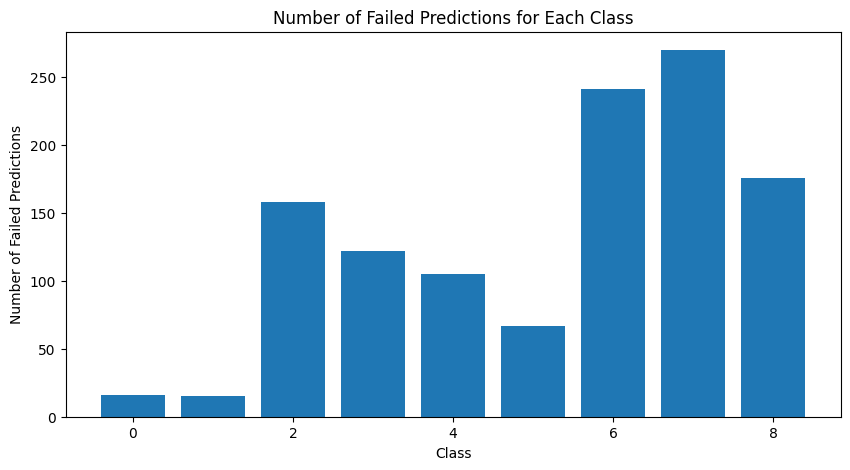

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of failed predictions for each class
failed_predictions = np.where(test_disorder_subclass_y != ensemble_predictions, 1, 0)
failed_predictions_per_class = np.bincount(test_disorder_subclass_y[failed_predictions == 1])

# Plot the number of failed predictions for each class
plt.figure(figsize=(10, 5))
plt.bar(range(len(failed_predictions_per_class)), failed_predictions_per_class)
plt.title('Number of Failed Predictions for Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Failed Predictions')
plt.show()